In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

__Подбрасывание монеты__

In [2]:
# при заданных границах от 0 до 2, функция генерирует числа 0 и 1
np.random.randint(0, 2)

1

In [3]:
# при добавлении в нукцию третьего параметра, мы указываем количество чисел
np.random.randint(0, 2, 10)

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1])

__Бросание игральной кости__

In [4]:
# имитируем 10 бросков
np.random.randint(1, 7, 10)

array([3, 1, 3, 4, 3, 2, 5, 5, 5, 6])

__Метод Монте-Карло__

Метод Монте-Карло позволяет исследовать какой-либо случайный процесс, многократно имитируя его с помощью компьютера.

В нашем случае мы будем многократно бросать игральную кость и для каждой серии испытаний рассчитывать эмпирическую вероятность выпадения двойки или тройки. Если с ростом количества испытаний в серии эмпирическая вероятность приблизится к теоретической, мы сможем подтвердить Закон больших чисел.

Вначале нам потребуется список серий с количеством испытаний в каждой из них. Причем для наглядности пусть количество испытаний от серии к серии увеличивается экспоненциально.

Создать такой список, вернее массив Numpy, можно с помощью функции np.logspace(). Она похожа на уже изученную нами функцию np.linspace() с той лишь разницей, что возвращает заданное количество чисел, которые равномерно распределены по логарифмической шкале в пределах заданного диапазона.

In [5]:
 # Параметр dtype = int позволяет отбросить дробные части
series = np.logspace(1, 6, dtype = 'int')
series

array([     10,      12,      15,      20,      25,      32,      40,
            51,      65,      82,     104,     132,     167,     212,
           268,     339,     429,     542,     686,     868,    1098,
          1389,    1757,    2222,    2811,    3556,    4498,    5689,
          7196,    9102,   11513,   14563,   18420,   23299,   29470,
         37275,   47148,   59636,   75431,   95409,  120679,  152641,
        193069,  244205,  308884,  390693,  494171,  625055,  790604,
       1000000])

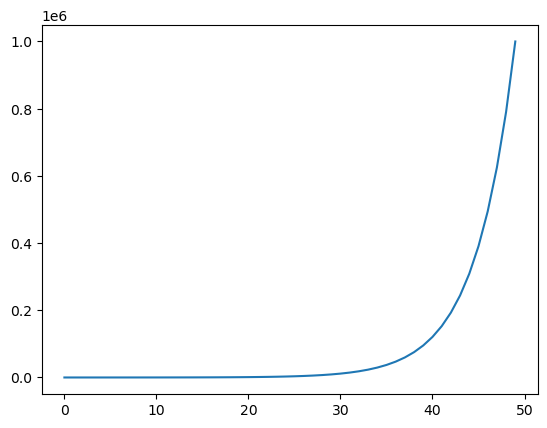

In [6]:
plt.plot(series)

Код для проведения испытаний

In [7]:
# обозначим точку отсчета
np.random.seed(42)

# во внешнем цикле пройдемся по сериям испытаний (их будет 50)
for i, trial in enumerate(series, 1):
    print(f'Серия: {i}, количество испытаний: {trial}\n')

    # во внутреннем цикле будем бросать кость
    for n in range(trial):
        result = np.random.randint(1, 7)
        print(f'Испытание: {n}, выпало число: {result}')

    # прервемся после первой серии
    break

Серия: 1, количество испытаний: 10

Испытание: 0, выпало число: 4
Испытание: 1, выпало число: 5
Испытание: 2, выпало число: 3
Испытание: 3, выпало число: 5
Испытание: 4, выпало число: 5
Испытание: 5, выпало число: 2
Испытание: 6, выпало число: 3
Испытание: 7, выпало число: 3
Испытание: 8, выпало число: 3
Испытание: 9, выпало число: 5


Создадим счетчик, в который будем записывать выпадения двойки или тройки. После окончания очередной серии испытаний разделим количество успешных бросков на общее количество испытаний.

In [8]:
np.random.seed(42)

# создадим счетчик для количества успешных испытаний
success = 0

# в двух циклах пройдемся по сериям и броскам в каждой серии
for trial in series:
    for n in range(trial):
        result = np.random.randint(1, 7)
        # и если результат будет равен 2 или 3
        if result == 2 or result == 3:
            success += 1

# в конце каждой серии подсчитаем долю успешных испытаний
    prob = success / trial

    print(f'Серия: {i}\n')
    print(f'Всего испытаний: {trial}')
    print(f'Успешных исходов: {success}')
    print(f'Эмпирическая вероятность: {prob}')

    break

Серия: 1

Всего испытаний: 10
Успешных исходов: 5
Эмпирическая вероятность: 0.5


In [9]:
%%time 

np.random.seed(42)

success = 0

prob_list = []

# пройдемся по сериям
for trial in series:
    # и броскам в каждой серии
    for n in range(trial):
        result = np.random.randint(1, 7)

        # посчитаем количество успешных бросков
        if result == 2 or result == 3:
            success += 1

    # вычислим долю успешных бросков
    prob = success / trial
    # добавим результат серии в список
    prob_list.append(prob)
    # обнулим счетчик для записи следующей серии
    success = 0

print(f'Проведено серий испытаний: {len(prob_list)}')
print(f'Эмпирическая вероятность каждой пятой серии: {np.round(prob_list[::5], 2)}')

Проведено серий испытаний: 50
Эмпирическая вероятность каждой пятой серии: [0.5  0.22 0.34 0.37 0.34 0.33 0.34 0.34 0.33 0.33]
CPU times: total: 4.5 s
Wall time: 7.49 s


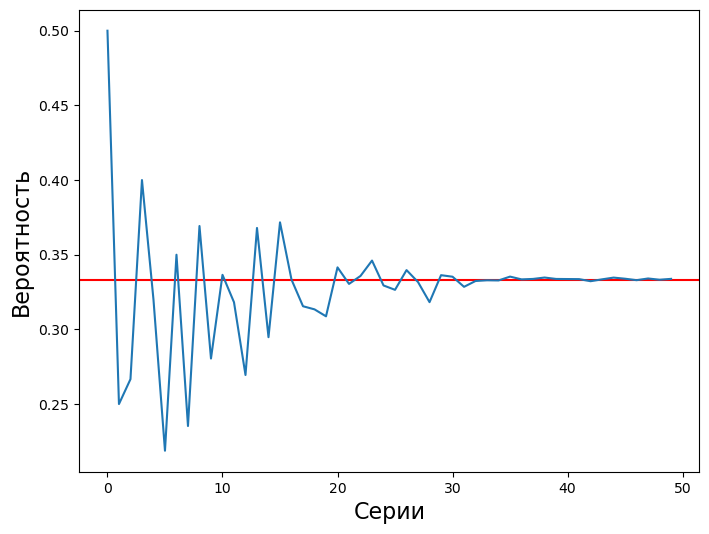

In [10]:
plt.figure(figsize = (8, 6))
# выведем горизонтальную линию теоритической вероятности
plt.axhline(y = 1/3, c = 'r')
plt.plot(prob_list)
plt.xlabel('Серии', fontsize = 16)
plt.ylabel('Вероятность', fontsize = 16)
plt.show()

__Пример векторизованного кода__

In [11]:
%%time 
np.random.seed(42)

# Создадим новый список для записи результатов
prob_list_2 = []

# пройдемся по каждой из 50 серий
for trial in series:
    # вместо второго цикла, передадим количество бросков
    # непосредственно в функцию np.random.randint(1, 7, trial)
    # и запишем полученные данные в массив result 
    result = np.random.randint(1, 7, trial)

    # в переменную success запишем сумму выпавших двоек или троек из массива result
    success = (result == 2).sum() + (result == 3).sum()

    #посчитаем долю успешных исходов
    prob = success / trial

    # и запишем ее в список
    prob_list_2.append(prob)

CPU times: total: 0 ns
Wall time: 47.1 ms


__Задача о двух конвертах__

Представьте, что вам дали конверт A, вы открыли его и увидели сумму X. После этого вам предлагают заменить этот конверт на другой конверт B, сумма в котором с одинаковой вероятностью либо в два раза меньше, либо в два раза больше суммы X. Стоит ли вам заменить конверт с A на B?

In [12]:
%%time
np.random.seed(50)

# количество испытаний
trials = 10000

# список для записи результатов
outcomes = []

for trial in range(trials):
    
    # будем генерировать в одинаковой вероятностью числа 0 и 1
    outcome = np.random.randint(0, 2)
    if outcome == 0:
        outcomes.append(2500)
    else:
        outcomes.append(10000)

# посчитаем среднее значение
sum(outcomes)/len(outcomes)

CPU times: total: 15.6 ms
Wall time: 27.5 ms


6259.75

Как мы видим, компьютер подтвердил, что в среднем (при достаточном количестве испытаний) будет выгоднее заменить канверт А на конвертВ

### __Метод случайных блужданий__

Генератор случайных чисел также применяется в так называемом методе случайных блужданий (random walk models, random walkers). С его помощью мы можем конструировать путь, состоящий из последовательности случайных шагов в определенном пространстве и, таким образом, моделировать различные процессы.

__Случайное блуждание по числовой прямой__

В самом простом варианте мы будем подбрасывать монету и смотреть, куда мы сдвинулись относительно предыдущего шага на числовой прямой.

In [13]:
np.random.seed(2)

# создадим список и запишем в него исходную позицию
moves = [0]

# запишем результат подбрасывания монеты
coins = []

for x in range(5):
    coin = np.random.randint(0, 2)

    # если выпадет 1, сдвинемся на одно значение от предыдущего результата
    # если выпадет 0, останемся на месте
    # запишем результат в список moves
    moves.append(moves[x] + coin)

    # запишем результат подбрасывания монеты
    coins.append(coin)

In [14]:
moves

[0, 0, 1, 2, 2, 2]

In [15]:
coins

[0, 1, 1, 0, 0]

__Из Москвы до Санкт-Петербурга__

Теперь усложним задачу и посмотрим, сможем ли мы добраться из Москвы до Санкт-Петербурга на довольно необычном транспортном средстве, движение которого зависит от бросания игральной кости. Условия следующие:

Нам нужно преодолеть ровно 700 километров;
Если при бросании кости выпадет единица или двойка, мы сместимся на 5 километров вперед;
Если тройка или четверка, то на 5 километров назад;
В случае если выпадет пять или шесть, мы повторно бросим кость и сдвинемся на выпавшее число километров умноженное на пять;
Кроме того, есть вероятность внезапной поломки. Она составляет менее 0,001, то есть менее 0,1%. В этом случае на эвакуаторе нас отвезут обратно в Москву для ремонта.
Дополнительно договоримся, что в обратном направлении мы двигаться не можем, то есть если нам будет все время не везти, в минус мы не уйдем, число пройденных километров не должно быть отрицательным.

__Функция случайного блуждания__

In [16]:
# объявим функцию random_walk()
def random_walk():

    # создадим список для записи перемещений от МСК до СПБ
    random_walk = [0]

    # в цикле из 100 итераций
    for m in range(99):

        # запишем последний достигнутый километр в переменную move
        move = random_walk[-1]

        # бросим кость
        dice = np.random.randint(1, 7)

        # если выпадет 1 или 2, сместимся на на пять вперед
        if dice <= 2:
            move = move + 5

        # если выпадет 3 или 4, на пять назад, но в любом случае остановимся на нуле
        elif dice <= 4:
            move = max(0, move - 5)

        # если выпадет 5 или 6, бросим кость еще раз и умножим результат на 5,
        # это и будет следующее перемещение
        else: 
            move = move + 5 * np.random.randint(1, 7)

        # в случае внезапной поломки вернемся на нулевой километр
        if np.random.rand() < 0.001:
            move = 0

        # запишем каждое движение в список random_walk
        random_walk.append(move)

    # вернем этот список при вызове функции
    return random_walk

Создание случайного блуждания


In [17]:
# вызовем функцию для генерации одного случайного блуждания
np.random.seed(42)

# вызовем функцию random_walk() и поместим результат в переменную rw
rw = random_walk()

In [18]:
# посмотрим на расстояние которое удалось преодолеть
rw[-1]

430

__Моделирование нескольких случайных блужданий__

Давайте посмотрим на то, какова вероятность в среднем преодолеть этот путь.

In [19]:
np.random.seed(42)

all_walks = []

# в цикле из 1000 итераций
for w in range(1000):

    # сгенерируем случайное блуждание
    rw = random_walk()

    # и поместим его в список all_walks
    all_walks.append(rw)



В переменной all_walks содержится список из списков. Преобразуем его в массив Numpy и транспонируем, чтобы отдельные случайные блуждания стали столбцами.

In [20]:
all_walks_T = np.array(all_walks).T
all_walks_T.shape

(100, 1000)

Для наглядности используем DataFrame

In [21]:
import pandas as pd

df = pd.DataFrame(all_walks_T)

df.tail()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
95,415,645,785,565,355,595,545,640,665,585,...,745,715,560,375,690,690,505,605,515,645
96,420,655,790,580,360,590,550,670,670,590,...,740,745,555,390,695,695,530,635,510,675
97,430,665,815,600,355,585,545,675,690,610,...,735,750,575,415,690,705,535,630,515,685
98,425,660,820,605,370,580,540,680,695,605,...,730,745,570,420,695,725,540,625,530,715
99,430,665,815,610,365,585,535,685,700,600,...,755,755,575,415,690,730,545,650,540,730


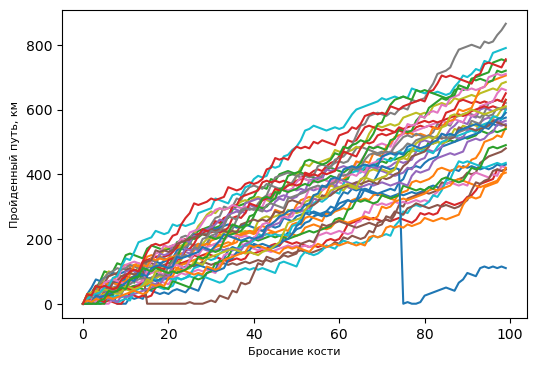

In [22]:
# Выведем результат на графике
plt.figure(figsize = (6, 4))

# Выведем каждое 30-е блуждание
plt.plot(all_walks_T[:, ::30])

# добавим подписи
plt.xlabel('Бросание кости', fontsize = 8)
plt.ylabel('Пройденный путь, км', fontsize = 8)

plt.show()

Теперь давайте возьмем достигнутые конечные точки каждого из 1000 испытаний и посмотрим на их распределение с помощью гистограммы.

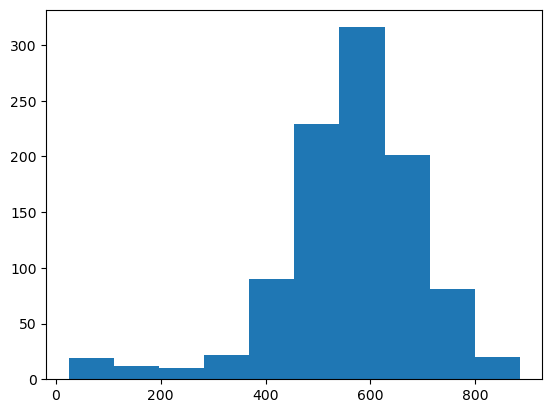

In [23]:
# возьмем последнюю строку нашего массива 
ends = all_walks_T[-1,:]
# построим гистограмму
plt.hist(ends)
plt.show()

In [24]:
# среднее растояние 
ends.mean()

561.415

Кроме того, мы можем рассчитать вероятность преодоления 700 км. Для этого с помощью функции np.count_nonzero() рассчитаем количество блужданий, преодолевших расстояние между двумя столицами, и разделим получившийся результат на общее количество испытаний.

In [25]:
np.count_nonzero(ends >= 700)/len(ends)

0.128

### __Вероятностное распределение__

__Дискретное вероятностное распределение__

In [26]:
np.random.seed(42)
# бросим кость 100 000 раз

dice = np.random.randint(1, 7, 100000)
dice[:10]

array([4, 5, 3, 5, 5, 2, 3, 3, 3, 5])

С помощью функции np.unique() посчитаем сколько раз выпадет каждый из шести возможных исходов

In [27]:
# функция np.unique() возвращает перечень уникальных элементов массива
# и их количество при параметре return_counts = True

elements, counts = np.unique(dice, return_counts = True)

print(elements)
print(counts)

[1 2 3 4 5 6]
[16592 16799 16390 16776 16810 16633]


In [28]:
# расчитаем долю каждого исхода в общем количестве испытаний
# выполним поэлементное деление частоты каждого исхода на общее количество бросков

fel_freq = (counts / len(dice)).round(3)
fel_freq

array([0.166, 0.168, 0.164, 0.168, 0.168, 0.166])

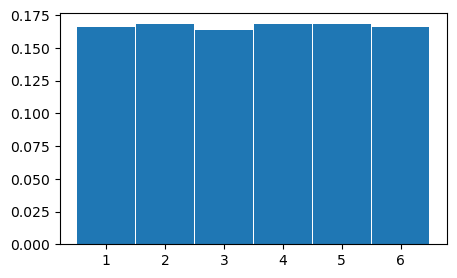

In [29]:
plt.figure(figsize = (5,3))

# передадим в plt.bar() категории (элементы) и их относительную частоту
# зададим параметр width, который контролирует ширину столбца
plt.bar(elements, fel_freq, width = 0.98)
plt.show()

__Распределение Бернулли__

Многие случайные процессы характеризуются только двумя исходами. Это и выпадение орла или решки при подбрасывании монет, и успех или неудача клинического испытания. Такие процессы можно моделировать с помощью распределения Бернулли (Bernulli distribution).

Давайте рассмотрим этот процесс на практике. На этот раз мы будем подбрасывать монету, но не обычную или симметричную монету (fair coin), а такую, в которой вероятность выпадения решки (обозначим ее p) равна 0,7, а вероятность орла — 0,3. Такую монету назвают неправильной или несимметричной (biased, unfair coin). После каждого подбрасывания запишем получившийся результат.

В Numpy нет отдельной функции для распределения Бернулли, поэтому напишем собственную функцию.

In [30]:
def bernoulli(p, iter = 1):
    result = np.array([])
    
    for i in range(iter):
        if np.random.rand() <= p:
            result = np.append(result, 1)
        else:
            result = np.append(result, 0)
    return result

In [31]:
res = bernoulli(0.7, 10000)

values, counts = np.unique(res, return_counts = True)

values, counts, counts / len(res)

(array([0., 1.]), array([3015, 6985], dtype=int64), array([0.3015, 0.6985]))

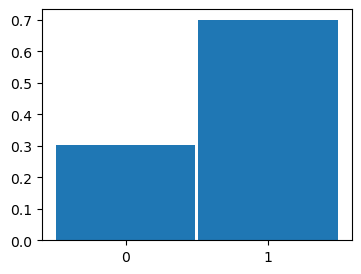

In [32]:
plt.figure(figsize = (4, 3))

# в качестве названия столбцов передадим '0' и '1' в формате строки,
# в качестве высоты - относительную частоту значений
plt.bar(['0', '1'], counts/len(res), width = 0.98)
plt.show()

### __Неприрывное вероятностное распределение__

__Неприрывное равномерное распределение__

In [33]:
# создадим распределение с параметрами a = 0 и b = 12
# повторим эксперимент 1 000 000 раз
np.random.seed(42)
res = np.random.uniform(0, 12, 1000000)
res[:10]

array([ 4.49448143, 11.40857168,  8.7839273 ,  7.18390181,  1.87222369,
        1.87193424,  0.69700335, 10.39411375,  7.21338014,  8.49687093])

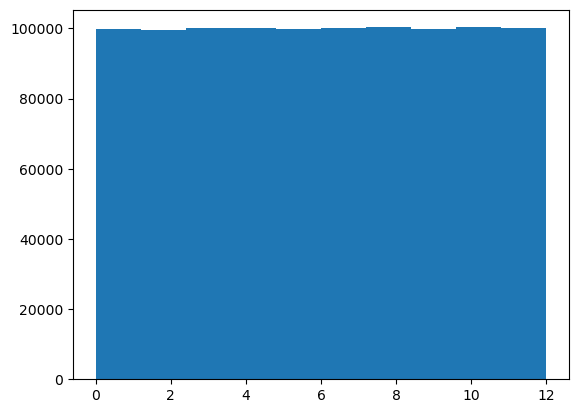

In [34]:
# посмотрим на результат с помощью гистограммы

plt.hist(res)
plt.show()

In [35]:
np.mean(res)

6.004013834108579

In [36]:
# посмотрим на дисперсию
np.var(res)

11.99300471628972

In [37]:
# экспериментальным путем найдем вероятность ожидания автобуса до семи минут включительно
# разделим количество значений <= 7 на общее количество значений
len(res[res <= 7])/len(res)

0.582825

__np.random.random__

Функция np.random.random(size = None) создает равномерное распределение в полуоткрытом интервале [0, 1). Параметр size задает размер этого распределения (количество экспериментов).

In [38]:
# создадим массив 2 х 3 в интервале от [0, 1)
np.random.seed(42)

# для этого передадим параметры в виде кортежа
np.random.random((2, 3))

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452]])

__np.random.rand__

Функция np.random.rand() практически идентична, единственное отличие - размеры массива передаются отдельными параметрами, а не кортежем

In [39]:
np.random.seed(42)
np.random.rand(2, 3)

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452]])

__np.random.uniform__

Для функции np.random.uniform(low = 0.0, high = 1.0, size = None) интервал [0, 1) является интервалом по умолчанию, при этом можно задать любой другой промежуток

In [40]:
np.random.uniform(9)

8.535331102654403

In [41]:
np.random.seed(42)
np.random.uniform(size = (2, 5))

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864],
       [0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258]])

### __Нормальное распределение__

В Питоне нормальное распределение создается с помощью функции np.random.normal()

In [42]:
np.random.seed(42)

# создадим 100 000 значений норм распределения с матожиданием 180 см и СКО 10 см
height_men = np.round(np.random.normal(180, 10, 100000))
height_women = np.round(np.random.normal(160, 10, 100000))

In [43]:
print(height_men[:10])
print(height_women[:10])

[185. 179. 186. 195. 178. 178. 196. 188. 175. 185.]
[170. 148. 166. 154. 157. 160. 159. 143. 174. 171.]


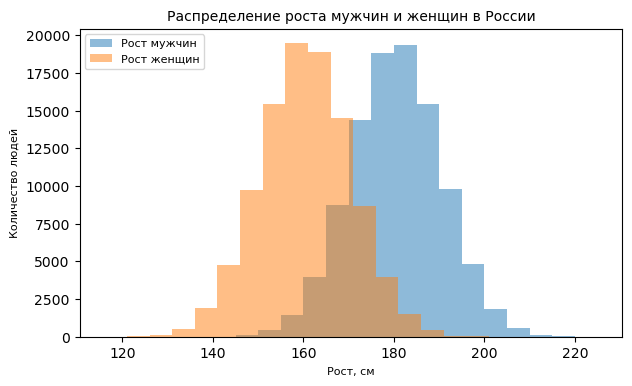

In [44]:
# выведем результат с помощью гистограммы
plt.figure(figsize = (7, 4))

# зададим 18 интервалов (bin) и уровень прозрачности графиков
plt.hist(height_men, 18, alpha = 0.5, label = 'Рост мужчин')
plt.hist(height_women, 18, alpha = 0.5, label = 'Рост женщин')

# пропишем расположение и размер шрифта легенды
plt.legend(loc = 'upper left', prop = {'size': 8})

# добавим подписи
plt.xlabel('Рост, см', fontsize = 8)
plt.ylabel('Количество людей', fontsize = 8)
plt.title('Распределение роста мужчин и женщин в России', fontsize = 10)

plt.show()

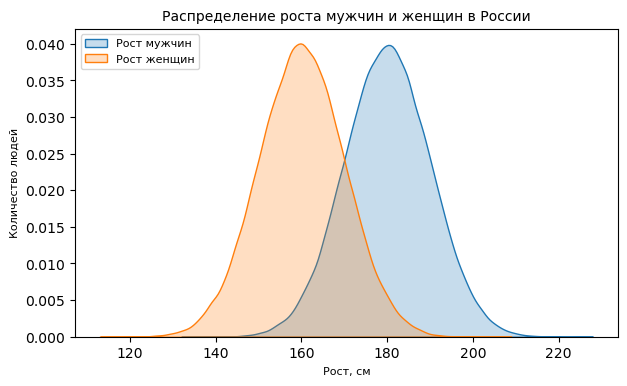

In [45]:
# также можно использовать график плотности распределения случайной величины
import seaborn as sns

plt.figure(figsize = (7, 4))

# построим график функции плотности
sns.kdeplot(height_men, fill = True, label = 'Рост мужчин')
sns.kdeplot(height_women, fill = True, label = 'Рост женщин')

plt.legend(loc = 'upper left', prop = {'size': 8})

# добавим подписи
plt.xlabel('Рост, см', fontsize = 8)
plt.ylabel('Количество людей', fontsize = 8)
plt.title('Распределение роста мужчин и женщин в России', fontsize = 10)

plt.show()

In [46]:
# еще одной полезной визуализацией является boxplot 
# удобно строить из DataFrame

data = pd.DataFrame({'Мужчины' : height_men, 'Женщины' : height_women})
data.head()

,Мужчины,Женщины
0,185.0,170.0
1,179.0,148.0
2,186.0,166.0
3,195.0,154.0
4,178.0,157.0


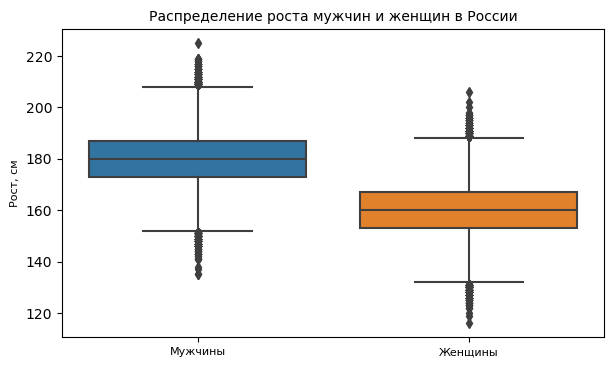

In [47]:
plt.figure(figsize = (7, 4))

sns.boxplot(data = data)

plt.xticks(fontsize = 8)
plt.ylabel('Рост, см', fontsize = 8)
plt.title('Распределение роста мужчин и женщин в России', fontsize = 10)

plt.show()

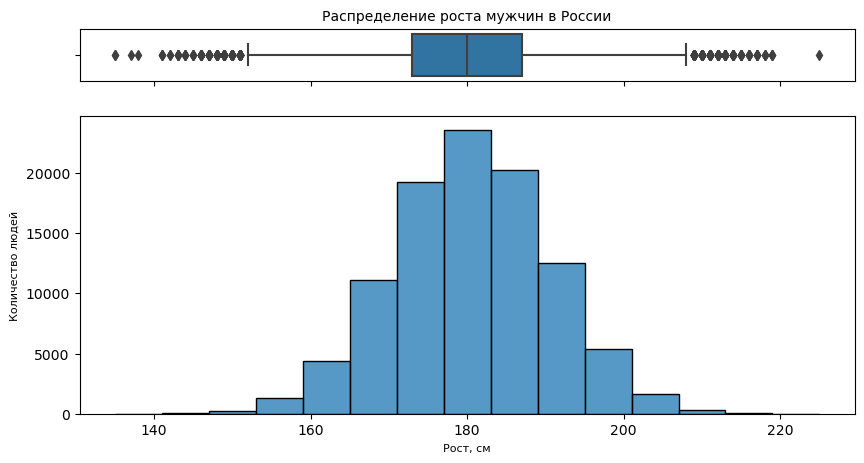

In [48]:
# пример совмещения boxplot и гистограммы

# создадим два подграфика
f, (ax_box, ax_hist) = plt.subplots(nrows = 2, # из двух строк
                                    ncols = 1, # и одного столбца
                                    sharex = True, # оставим только нижние подписи
                                    gridspec_kw = {'height_ratios' : (.15, .85)}, # зададим разную высоту строк
                                    figsize = (10, 5))

# в первом подграфике построим boxplot 
sns.boxplot(x = height_men, ax = ax_box)
# во втором гистограмму
sns.histplot(data = height_men, bins = 15, ax = ax_hist)

# зададим заголовок и подписи к осям
ax_box.set_title('Распределение роста мужчин в России', fontsize = 10)
ax_hist.set_xlabel('Рост, см', fontsize = 8)
ax_hist.set_ylabel('Количество людей', fontsize = 8)

plt.show()

__Расчет вероятности__

Теперь давайте рассчитаем вероятность того, что рост случайно встретившегося нам человека на улице составляет менее 190 см.

Вначале рассчитаем теоретическую вероятность. Для создания «идеального» теоретического распределения воспользуемся библиотекой scipy.

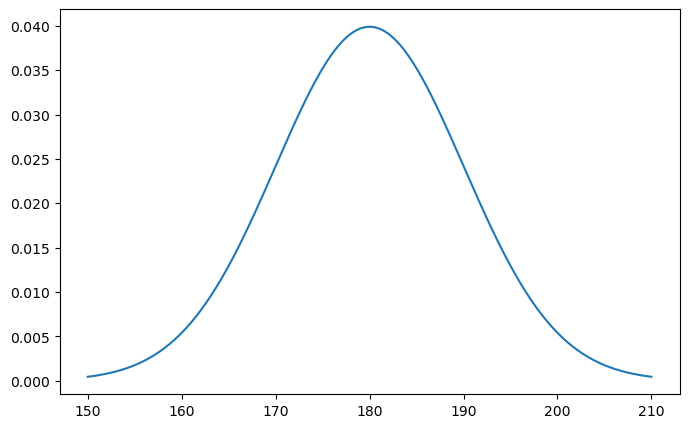

In [49]:
# импортируем объект norm из модуля stats библиотеки scipy
from scipy.stats import norm

# зададим зазмер графика
plt.figure(figsize = (8, 5))

# пропишем среднее значение и СКО
mean, std = 180, 10

# создадим пространство из 1000 точек в диапазоне +/- трех СКО от среднего значения
x = np.linspace(mean - 3 * std, mean + 3 * std, 1000)

# рассчитаем значения по оси н с помощью метода .pdf()
# т.е. функции плотности распределения 
f = norm.pdf(x, mean, std)

# построи график
plt.plot(x, f)

plt.show()

Как и в случае с равномерным распределением задача сводится к нахождению площади под кривой от минус бесконечности до 190 см включительно.

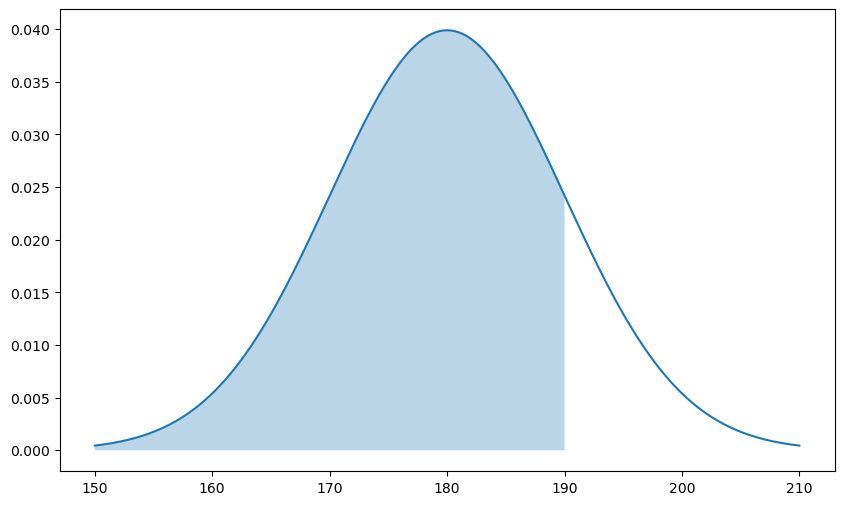

In [50]:
plt.figure(figsize = (10, 6))

mean, std = 180, 10

x = np.linspace(mean - 3 * std, mean + 3 * std, 1000)

f = norm.pdf(x, mean, std)

plt.plot(x, f)

# дополнительно создадим точки на оси х для закрашенной области
px = np.linspace(mean - 3 * std, 190, 1000)

# и заполним в пределах этих точек по оси х пространство
# от кривой нормального распределения до оси у = 0
plt.fill_between(px, norm.pdf(px, mean, std), alpha = 0.3)

# выведем оба графика
plt.show()

In [51]:
# найдем площадь с помощью функции распределения
# передадим методу .cdf() границу (рост), среднее значение loc и СКО (scale) 
area = norm.cdf(190, loc = 180, scale = 10)
area

0.8413447460685429

In [52]:
# обратное вычисление, то есть нахождение значения (роста) по площади выполняется
# с помощью квантиль-функции
height = norm.ppf(area, loc = 180, scale = 10)
height

190.0

Рассчитать вероятность того, что нам встретится человек выше 190 см очень просто. Так как мы знаем, что площадь под кривой нормального распределения равна единице, нам достаточно вычесть найденную слева от 190 см площадь из одного.

In [53]:
# рассчитаем вероятность встретить человека выше 190 см
1 - norm.cdf(190, loc = 180, scale = 10)

0.15865525393145707

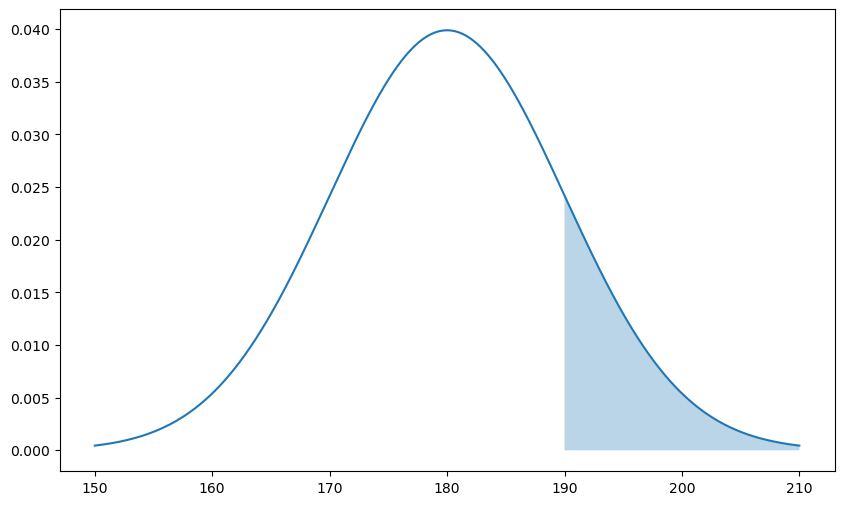

In [54]:
plt.figure(figsize = (10, 6))

mean, std = 180, 10

x = np.linspace(mean - 3 * std, mean + 3 * std, 1000)

f = norm.pdf(x, mean, std)

plt.plot(x, f)

# дополнительно создадим точки на оси х для закрашенной области
px = np.linspace(190, mean + 3 * std, 1000)

# и заполним в пределах этих точек по оси х пространство
# от кривой нормального распределения до оси у = 0
plt.fill_between(px, norm.pdf(px, mean, std), alpha = 0.3)

# выведем оба графика
plt.show()

Если нужно вычислить площадь между двумя значениями 
 и 
, например, между 170 и 190 см, из большего, находящегося правее значения функции распределения, можно вычесть меньшее, находящееся левее.

In [55]:
# рассчитаем меньшую площадь до нижней границы
lowerbound = norm.cdf(170, loc = 180, scale = 10)

# рассчитаем большую площадь до верхней границы
upperbound = norm.cdf(190, loc = 180, scale = 10)

# Вычтем меньшую площадь из большей
upperbound - lowerbound

0.6826894921370859

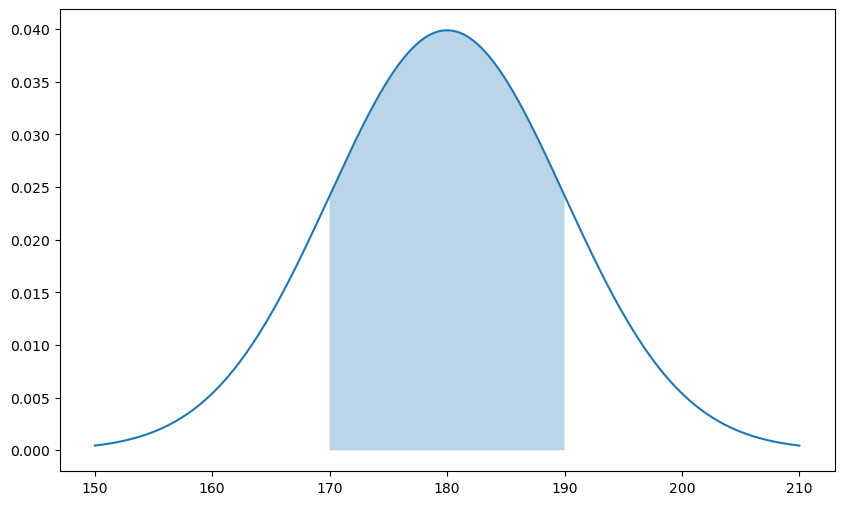

In [56]:
plt.figure(figsize = (10, 6))

mean, std = 180, 10

x = np.linspace(mean - 3 * std, mean + 3 * std, 1000)

f = norm.pdf(x, mean, std)

plt.plot(x, f)

# дополнительно создадим точки на оси х для закрашенной области
px = np.linspace(170, 190, 1000)

# и заполним в пределах этих точек по оси х пространство
# от кривой нормального распределения до оси у = 0
plt.fill_between(px, norm.pdf(px, mean, std), alpha = 0.3)

# выведем оба графика
plt.show()

Теперь вернемся к нашим данным и рассчитаем эмпирическую вероятность встретить человека с ростом не более 190 см.

In [57]:
# разделим количество людей с ростом <= 190 на общее количество наблюдаемых
len(height_men[height_men <= 190])/len(height_men)

0.85195

### __Функция плотности и функция распределения__

Вероятность того, что случайная величина примет значение не более заданного в интервале (-бесконечность; х]
 равна площади под кривой функции плотности на этом промежутке;
Эта площадь вычисляется с помощью функции распределения.

Одновременно, известно, что площадь под кривой определяется как интеграл функции этой кривой на заданном промежутке.

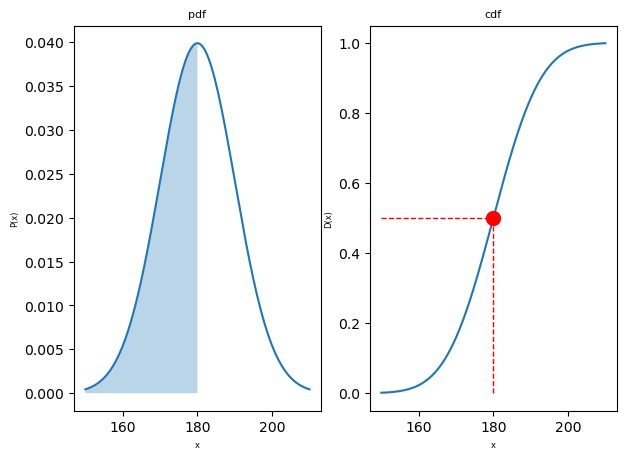

In [58]:
# размер грфика функции
plt.figure(figsize = (7, 5))

# определим среднее значение и СКО
mean, std = 180, 10

# зададим последовательность точек на оси х
x = np.linspace(mean - 3 * std, mean + 3 * std, 1000)

# найдем значения функции плотности
y1 = norm.pdf(x, mean, std)

# и функции распределения
y2 = norm.cdf(x, mean, std)

# на левом графике (row 1, col 2, index 1)
plt.subplot(1, 2, 1)

# построи функцию плотности
plt.plot(x, y1)

# и заполним пространство под кривой вплоть до точки х = 180
px = np.linspace(mean - 3 * std, 180, 1000)
plt.fill_between(px, norm.pdf(px,mean,std), alpha = 0.3)

# добавим заголовок и подписи к осям
plt.title('pdf', fontsize = 8)
plt.xlabel('x', fontsize = 6)
plt.ylabel('P(x)', fontsize = 6)

# на правом графике (row 1, col 2, index 2)
plt.subplot(1, 2, 2)

# построим функцию распределения
plt.plot(x, y2)

# а также горизонтальную и вертикальную пунктирные линии
plt.hlines(y = 0.5, xmin = 150, xmax = 180, linewidth = 1, color = 'r', linestyles = '--')
plt.vlines(x = 180, ymin = 0, ymax = 0.5, linewidth = 1, color = 'r', linestyles = '--')

# которые сойдутся в точке (180, 0.5)
plt.plot(180, 0.5, marker = 'o', markersize = 10, markeredgecolor = 'r', markerfacecolor = 'r')

# добавим заголовок и подписи к осям
plt.title('cdf', fontsize = 8)
plt.xlabel('x', fontsize = 6)
plt.ylabel('D(x)', fontsize = 6)

plt.show()

Продолжим исследовать связь функции плотности и функции распределения. Совместим обе функции на одном графике.

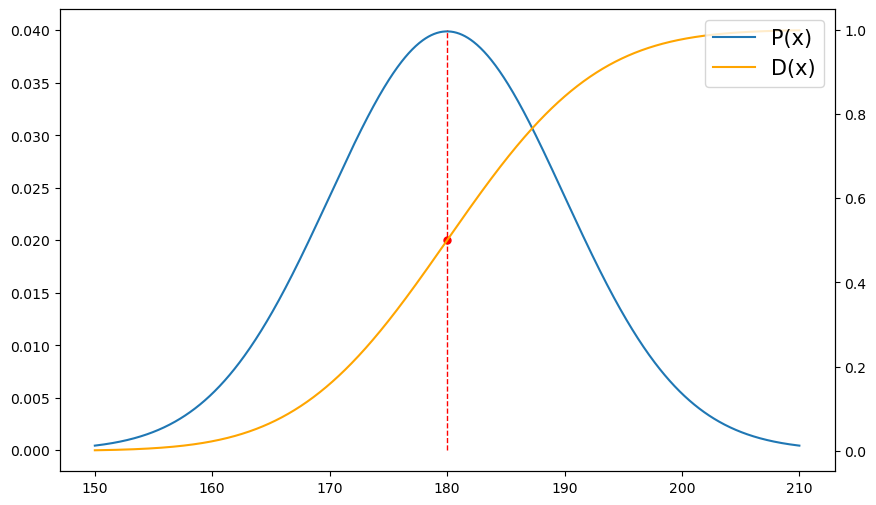

In [59]:
# зададим функции pdf и cdf на оси х
x = np.linspace(mean - 3 * std, mean + 3 * std, 1000)

# при этом возникает проблема: по оси у них разный масштаб
y1 = norm.pdf(x, mean, std)
y2 = norm.cdf(x, mean, std)

# эту проблему можно решить через функции subplots() и twinx()
# создадим сетку из одной ячейки
fig, ax_left = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 6))

# создадим новую ось с правой стороны
ax_right = ax_left.twinx()

# на оси х и левой оси у построим график функции плотности (pdf) 
ax_left.plot(x, y1, label = 'P(x)')

# на оси х и правой оси у построим график функции распределения (cdf)
ax_right.plot(x, y2, color = 'orange', label = 'D(x)')

# так же построим вертикальную прямую и точку
ax_left.vlines(x = 180, ymin = 0, ymax = 0.040, linewidth = 1, color = 'r', linestyles = '--')
ax_left.plot(180, 0.020, marker = 'o', markersize = 5, markeredgecolor = 'r', markerfacecolor = 'r')

# из-за двух осей с легендой придется повозится
fig.legend(loc = 'upper right',
           bbox_to_anchor = (1, 1),
           bbox_transform = ax_right.transAxes,
           prop = {'size': 15})

plt.show()

Здесь вначале посмотрим на функцию распределения 
 (оранжевый график). В промежутке от 150 до 210 см эта функция непрерывно возрастает, при этом она возрастает с разной скоростью. До точки x = 180 (она называется точкой перегиба, inflection point) скорость возрастания функции увеличивается, после нее убывает.

Именно это изменение описывает производная от нее функция плотности 
 (синий график). На участке от 150 до 180 она возрастает, а потом в интервале от 180 до 210 постоянно убывает.

Таким образом, плотность вероятности описывает скорость изменения функции распределения.

Рассмотрим взаимосвязь двух рассматриваемых функций через __вычисление интеграла__

In [60]:
import scipy.integrate as integrate

# зададим среднее значение и СКО
mu, sigma = 180, 10

# и границы интервала от 190 до бесконечности
lowerbound = 190
upperbound = np.inf

# функция quad() в качестве первого аргумента ожидает функцию для интегрирования
# напишем функцию gauss() с одним параметром
def gauss(x):
    return norm.pdf(x, mu, sigma)

# передадим в функцию quad() функцию Гаусса а также  нижний и верхний пределы
# поместив первое выводимое значение в переменную integral
integral = integrate.quad(gauss, lowerbound, upperbound)[0]

# так как мы получили вероятность от 190 см и выше (то есть площадь справа)
# для нахождения вероятности не более 190 см результат нужно вычесть из единицы
1 - integral

0.8413447460685429

__Вероятность конкретного значения__

Важный и немного контринтуитивный момент. Вероятность того, что случайная величина непрерывного распределения примет конкретное значение (то есть нам встретится человек определенного роста) равна нулю.

### __Формирование выборки__

In [61]:
bag = ['red', 'yellow', 'green', 'gray', 'black', 'orange', 'white', 'blue', 'brown', 'pink']

__Выборка с возвращением__ Случайным образом достаем элемент, но, прежде чем взять следующий, кладем этот элемент обратно. имитировать его можно с помощью функции np.random.choice().

In [62]:
np.random.seed(42)

# выберем с возвращением 8 шаров
np.random.choice(bag, 8)

array(['white', 'gray', 'blue', 'black', 'white', 'pink', 'green',
       'white'], dtype='<U6')

__Выборка без возвращения__ (sampling without replacement). В этом случае мы не кладем элемент обратно, а откладываем в сторону и только потом достаем следующий элемент. Для этого функции np.random.choice() нужно задать параметр replace = False.

In [63]:
np.random.seed(42)

# выберем без возвращения 8 шаров
np.random.choice(bag, 8, replace = False)

array(['brown', 'yellow', 'orange', 'red', 'blue', 'green', 'pink',
       'black'], dtype='<U6')

### __Центральная передельная теорема__

In [64]:
# скошенное распределение будем строить с помощью объекта skewnorm 
# модуля stats библиотеки scipy 
from scipy.stats import skewnorm

# сгенерируем массив с данными о зарплате, задав искусственные параметры
salaries = skewnorm.rvs(a = 20, # скошенность (skewness)
                        loc = 20, # среднее значение без учета скошенности
                        scale = 80, # отклонение от среднего
                        size = 100000, # размер генерируемого массива
                        random_state = 42) # воспроизводимость результата

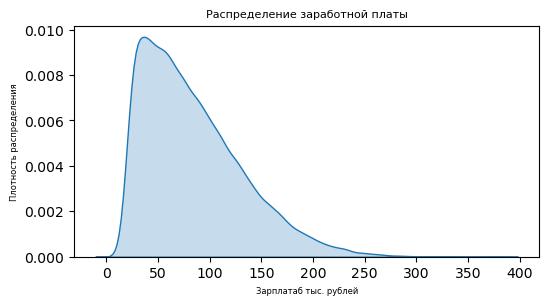

In [65]:
plt.figure(figsize = (6, 3))

# построим график функции плотности
sns.kdeplot(salaries, fill = True)

# добавим подписи
plt.xlabel('Зарплатаб тыс. рублей', fontsize = 6)
plt.ylabel('Плотность распределения', fontsize = 6)
plt.title('Распределение заработной платы', fontsize = 8)

plt.show()

In [66]:
np.mean(salaries)

83.84511076271755

In [67]:
np.median(salaries)

74.07573752156253

In [68]:
np.std(salaries)

48.366511941114176

__Выборки с возвращением.__ Теперь давайте брать выборки из нашей скошенной генеральной совокупности salaries и смотреть, что произойдет с распределением выборочных средних. Вначале создадим необходимое количество выборок.


In [69]:
np.random.seed(42)

# создадим список, в который будем записывать выборочные средние
sample_means = []

# зададим количество и размер выборок
n_samples = 1000
sample_size = 30

# в цикле будем формировать выборки
for i in range(n_samples):
    # путем отбора нужного количества элементов из генеральной совокупности
    sample = np.random.choice(salaries, sample_size, replace = False)
    # для каждой выборки рассчитаем среднее значение и поместим в список выборочных средних
    sample_means.append(np.mean(sample))

# проверим что свормировалось нужное количество выборок
len(sample_means)

1000

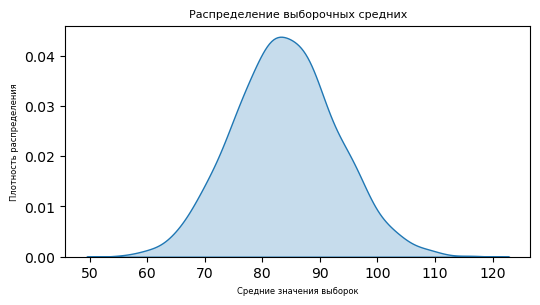

In [70]:
plt.figure(figsize = (6, 3))

# построим график функции плотности
sns.kdeplot(sample_means, fill = True)

plt.xlabel('Средние значения выборок', fontsize = 6)
plt.ylabel('Плотность распределения', fontsize = 6)
plt.title('Распределение выборочных средних', fontsize = 8)

plt.show()

Остается рассчитать значения, к которым, согласно ЦПТ, должны стремиться среднее значение и СКО выборочных средних.

In [71]:
np.mean(salaries), np.std(salaries)/np.sqrt(sample_size)

(83.84511076271755, 8.830476539330403)

In [72]:
np.mean(sample_means), np.std(sample_means)

(83.93586714203595, 8.94762726282006)

__Выборки без возвращения.__ Теперь, давайте понаблюдаем, как будет меняться распределение выборочных средних при различных значениях количества выборок и их размера.

Для формирования распределения выборок без возвращения напишем собственную функцию sample_means(). На входе она будет принимать следующие параметры:

data — набор данных (генеральная совокупность);
n_samples — количество выборок;
sample_size — размер одной выборки;
replace = True — с возвращением делать выборки или без;
random_state = None — воспроизводимость результата.ьтата.ьтата.ьтата.льтата.

In [73]:
# объявим функцию
def sample_means(data, n_samples, sample_size, replace = True, random_state = None):

    # создадим список, в который будем записывать выборочные средние
    sample_means = []

    # пропишем воспроизводимость
    np.random.seed(random_state) 

    # в цикле будем формировать выборки
    for i in range(n_samples):

        # путем отбора нужного количества элементов из генеральной совокупности
        sample = np.random.choice(data, sample_size, replace = False)

        # для каждой выборки расчитаем среднее значение и поместим в список выборочных средних
        sample_means.append(np.mean(sample))

        # если указано, что выборки делаются без возвращения
        if replace == False:

            # удалим эту выборку из данных о зарплате
            data = np.array(list(set(data) - set(sample)))

    # вернем список с выборочными средними
    return sample_means

In [74]:
# Протестируем эту функцию
# сформируем 100 выборок без возвращения по 30 элементов в каждой
res = sample_means(salaries, 100, 30, replace = False, random_state = 42) 

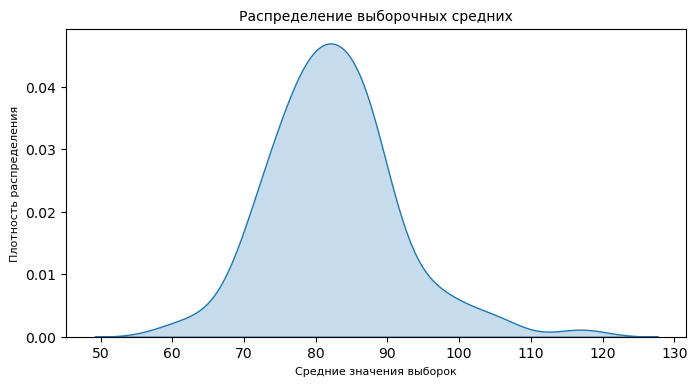

In [75]:
plt.figure(figsize = (8, 4))

# построим график функции плотности
sns.kdeplot(res, fill = True)

plt.xlabel('Средние значения выборок', fontsize = 8)
plt.ylabel('Плотность распределения', fontsize = 8)
plt.title('Распределение выборочных средних', fontsize = 10)

plt.show()

Теперь сгенерируем несколько распределений выборочных средних с 20, 100 и 500 выборками в распределении и размером выборки в 2, 10 и 30 значений.

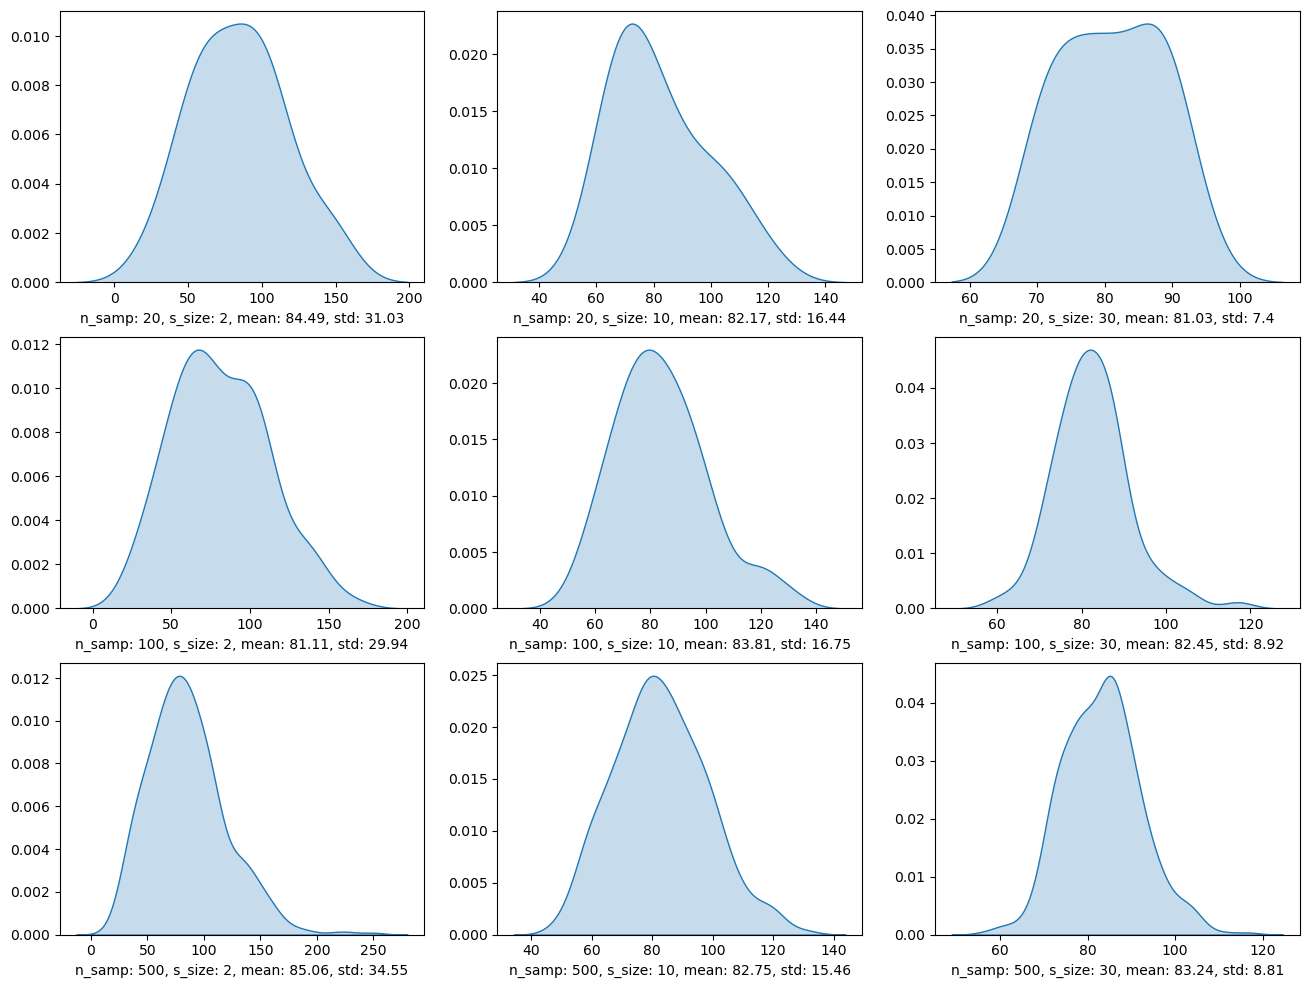

In [76]:
# создадим сетку подграфиков
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (16, 12))

# списки с разным количеством
number_of_samples_list = [20, 100, 500]
# и размером выборок
sample_size_list = [2, 10, 30]

# кроме этого, создадим списки для учета получившихся средних значений
mean_list = []
# и СКО
std_list = []

# по строкам сетки 3 х 3 разместим разное количество выборок
for i, n_samples in enumerate(number_of_samples_list):
    # по столбцам разный размер выборки
    for j, sample_size in enumerate(sample_size_list):

        # на каждой итерации будем генерировать "свежую" генеральную совокупность
        salaries = skewnorm.rvs(a = 20, loc = 20, scale = 80, size = 100000, random_state = 42)

        # и создавать распределение с заданными параметрами
        res = sample_means(salaries, n_samples, sample_size, replace = False, random_state = 42)

        # вычислим среднее значение и СКО
        mean = np.mean(res).round(2)
        std = np.std(res).round(2)

        # и записываем их в соответствующие списки
        mean_list.append(mean)
        std_list.append(std)

        # помещаем график плотности распределения в ячейку с координатами [i, j]
        sns.kdeplot(res, fill = True, ax = ax[i, j])
        # а под графиком выводим количество выборок, размер выборки, среднее значение и СКО
        ax[i, j].set_xlabel('n_samp: {}, s_size: {}, mean: {}, std: {}'.format(n_samples, sample_size, mean, std))
        # подпись к оси у оставляем пустой
        ax[i, j].set_ylabel('')

plt.show()

давайте посмотрим на параметры этих распределений в табличной форме и сравним с «целевыми» показателями, основанными на ЦПТ.

In [77]:
# вновь создадим генеральную совокупность
salaries = skewnorm.rvs(a = 20, loc = 20, scale = 80, size = 100000, random_state = 42)

# в словарь sampling_distributions поместим
sampling_distributions = {
    # количество выборок в каждом из девяти распределений
    'Number_of_samples' : np.repeat(number_of_samples_list, 3),
    # размер каждой выборки
    'Sample_size' : sample_size_list * 3,
    # Среднее значение генеральной совокупности
    'Pop_mean' : [np.mean(salaries)] * 9,
    # фактическое среднее значение каждого распределения
    'Actual_mean' : mean_list,
    # расчетное СКО (в соответствии с WGN)
    'Expected_std' : [np.std(salaries) / np.sqrt(n) for n in sample_size_list * 3],
    # фактическое СКО каждого распределения
    'Actual_std' : std_list
}

# превратим словарь в датафрейм и округлим значения
pd.DataFrame(sampling_distributions).round(2).astype(str)

,Number_of_samples,Sample_size,Pop_mean,Actual_mean,Expected_std,Actual_std
0,20,2,83.85,84.49,34.2,31.03
1,20,10,83.85,82.17,15.29,16.44
2,20,30,83.85,81.03,8.83,7.4
3,100,2,83.85,81.11,34.2,29.94
4,100,10,83.85,83.81,15.29,16.75
5,100,30,83.85,82.45,8.83,8.92
6,500,2,83.85,85.06,34.2,34.55
7,500,10,83.85,82.75,15.29,15.46
8,500,30,83.85,83.24,8.83,8.81


### __Стандартное нормальное отклонение__

In [78]:
height_men_standard = (height_men - np.mean(height_men))/np.std(height_men)
height_men_standard[:10]

array([ 0.49836188, -0.10076518,  0.59821639,  1.49690697, -0.20061969,
       -0.20061969,  1.59676148,  0.7979254 , -0.50018322,  0.49836188])

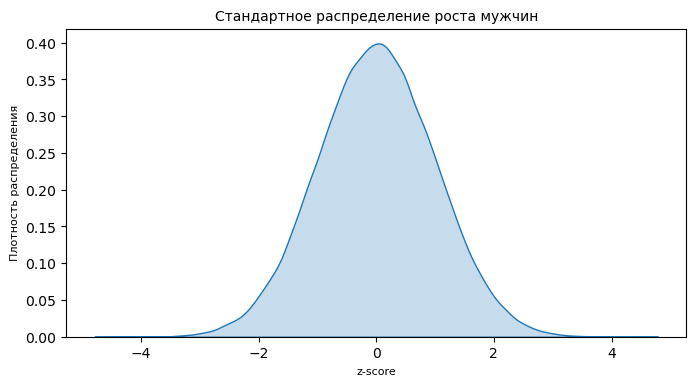

In [79]:
plt.figure(figsize = (8, 4))

# построим график плотности
sns.kdeplot(height_men_standard, fill = True)

# добавим подписи
plt.xlabel('z-score', fontsize = 8)
plt.ylabel('Плотность распределения', fontsize = 8)
plt.title('Стандартное распределение роста мужчин', fontsize = 10)

plt.show()

Стоит сказать, что ровно такого же результата можно добиться, применив метод .fit_transform() класса ScandardScaler модуля preprocessing библиотеки sklearn.

In [80]:
# импортируем класс StandartScaler

from sklearn.preprocessing import StandardScaler

# создаем объект этого класса
scaler = StandardScaler()

# применяем метод .fit_transform к данным о росте, предварительно превратив их в двумерный массив
scaled_height_men = scaler.fit_transform(height_men.reshape(-1, 1))

# убираем второе измерение
scaled_height_men = scaled_height_men.flatten()

# и сравниваем получившийся результат с ранее стандартизированными данными
np.array_equiv(height_men_standard, scaled_height_men)

True

Стандартное нормальное распределение можно также создать с помощью функции __np.random.standard_normal()__.

In [81]:
# создадим массив из 10 000 значений
st_norm = np.random.standard_normal(10000)

st_norm[:10]

array([-0.76366945, -1.11864174, -0.77088274,  0.96929238, -0.69869956,
       -1.34853749, -0.94994848,  0.99902749,  0.30575659, -0.45619504])

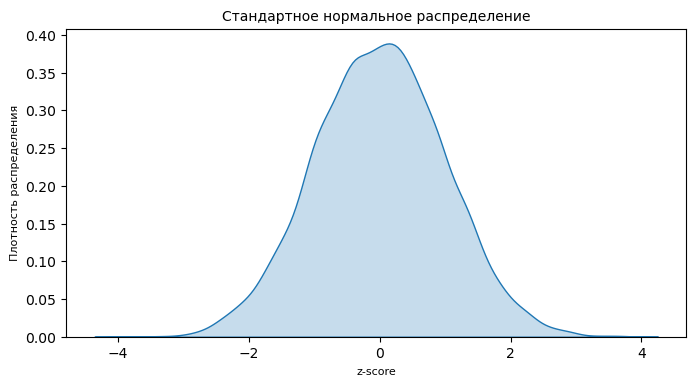

In [82]:
plt.figure(figsize = (8, 4))

sns.kdeplot(st_norm, fill = True)

plt.xlabel('z-score', fontsize = 8)
plt.ylabel('Плотность распределения', fontsize = 8)
plt.title('Стандартное нормальное распределение', fontsize = 10)

plt.show()

Создаваемый массив также может быть многомерным.

In [83]:
# для этого измерения нужно передать в виде кортежа
np.random.standard_normal((2, 3))

array([[-0.40187015, -0.0797878 , -0.21066058],
       [-0.70034594,  0.10488661,  0.85464581]])

In [84]:
# вычислим z-score, соответствующий 95 процентам площади под кривой
# loc = 0, scale = 1 можно не указывать, это параметры по умолчанию
zscore = norm.ppf(0.95)
zscore

1.6448536269514722

Убедиться в верности результата можно с помощью функции распределения.


In [85]:
norm.cdf(zscore)

0.95

__Критерии нормальности распределения__

Рассмотрим два способа оценки нормальности распределения

1. график нормальной вероятности

In [86]:
# вначале отсортируем данные о росте
height_men_srt = sorted(height_men)

# рассчитаем длину массива
n = len(height_men_srt)

# вычислим накопленную вероятность 
cum_probability = [(i - 0.375)/(n + 0.25) for i in range(1, n +1)]

# рассчитаем квантили, как если бы данные были нормально распределены
quantiles = norm.ppf(cum_probability)

In [87]:
# как и должно быть, накопленная вероятность - это значения от 0 до 1
cum_probability[0], cum_probability[-1]

(6.249984375039063e-06, 0.999993750015625)

In [88]:
# так же посмотрим на соответствующие им квантили
quantiles[0], quantiles[-1]

(-4.368680139037586, 4.368680139037566)

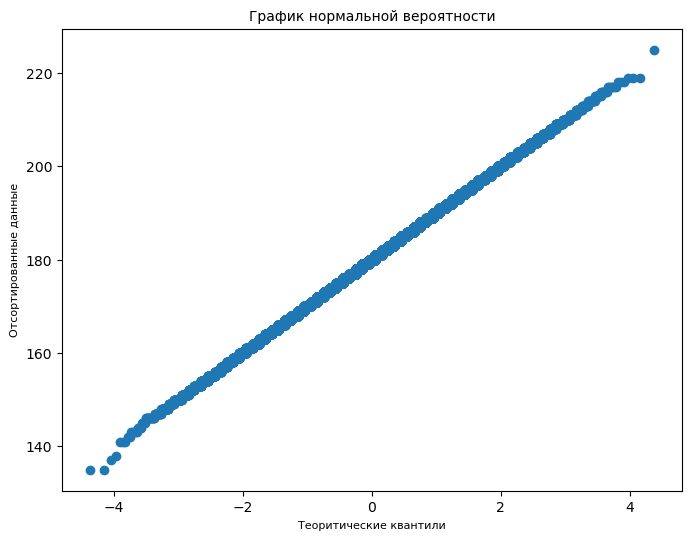

In [89]:
plt.figure(figsize = (8, 6))

# на точечной диаграмме по оси х разместим теоритические квантили, по у - отсортированные по возрастанию данные
plt.scatter(quantiles, height_men_srt)

plt.xlabel('Теоритические квантили', fontsize = 8)
plt.ylabel('Отсортированные данные', fontsize = 8)
plt.title('График нормальной вероятности', fontsize = 10)

plt.show() 

можно воспользоваться функцией __probplot()__ модуля stats библиотеки scipy 

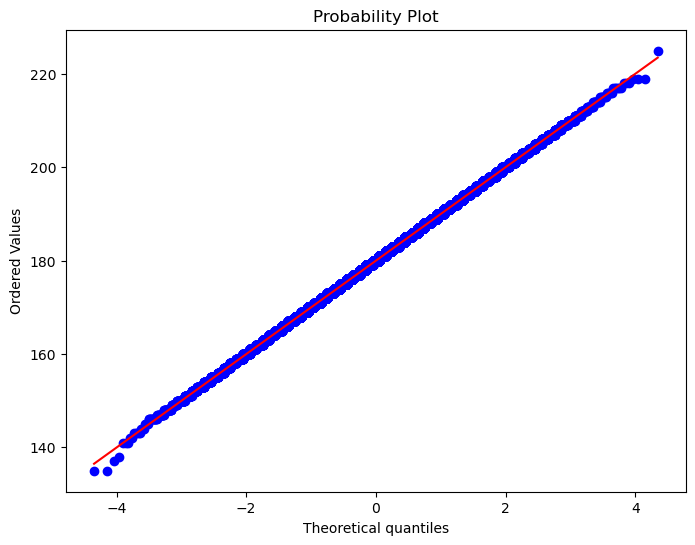

In [90]:
from scipy.stats import probplot

plt.figure(figsize = (8, 6))

# параметр dist = 'norm' указывает на сравнение данных с нормальным распределением plot = plt строит график с помощью matplotlib.pyplot 
probplot(height_men, dist = 'norm', plot = plt)

plt.show()

Эта функция использует другую формулу для вычисления накопленной вероятности (а именно Filliben’s estimate), поэтому квантили незначительно, но будут отличаться от написанного нами алгоритма.

In [91]:
# функция probplot() при параметрах plot = None, fit = False возвращает два массива:
# квантили и отсортированные данные, возьмем первый массив [0]
quantiles = probplot(height_men, dist = 'norm', plot = None, fit = False)[0]

# посмотрим на первое и последнее значения
quantiles[0], quantiles[-1]

(-4.346021549886044, 4.346021549886044)

Давайте построим график нормальной вероятности для скошенного вправо распределения (мы договорились, что это распределение зарплат).

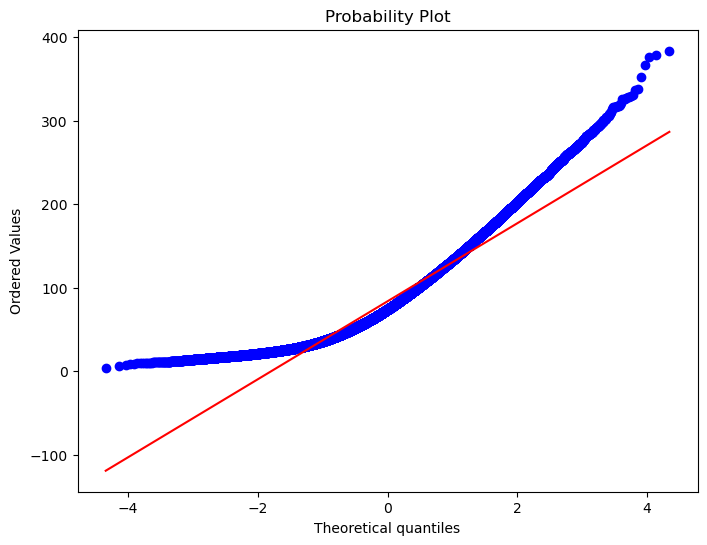

In [92]:
plt.figure(figsize = (8, 6))
probplot(salaries, dist = 'norm', plot =  plt)
plt.show()

Остается построить график для распределения выборочных средних.

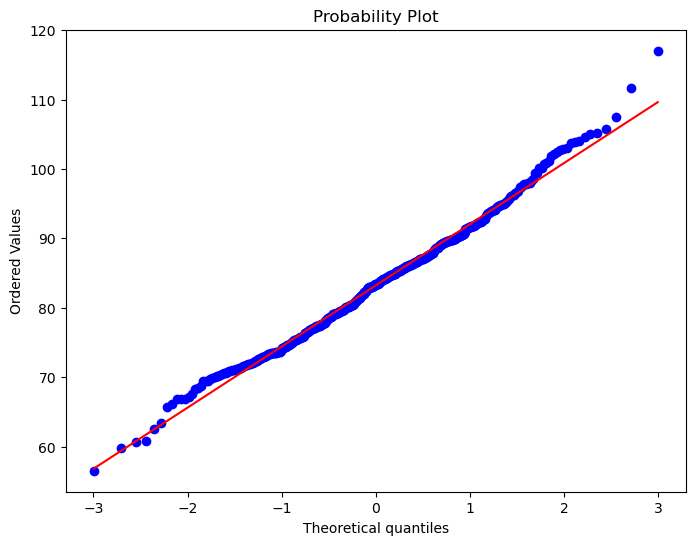

In [93]:
# снова воспользуемся функцией sample_means() с параметрами n_samples = 500, sample_size = 30
sampling_dist = sample_means(salaries, 500, 30, replace = False, random_state = 42)

plt.figure(figsize = (8,6))
probplot(sampling_dist, dist = 'norm', plot = plt)
plt.show()

2. Тест Шапиро-Уилка

Тест Шапиро-Уилка (Shapiro-Wilk test) позволяет сделать статистически значимый вывод о нормальности распределения.

Нулевая гипотеза предполагает, что распределение нормально;
Альтернативная гипотеза утверждает обратное.
Тест Шапиро-Уилка чувствителен к количеству элементов (N) в наборе данных и теряет точность при N > 5000.

Проведем тест для распределений роста и распределения зарплат при пороговом значении 0,05, однако вначале создадим распределения с меньшим количеством элементов.

In [94]:
np.random.seed(42)
height_men = np.round(np.random.normal(180, 10, 1000))

salaries = skewnorm.rvs(a = 20, loc = 20, scale = 80, size = 1000, random_state = 42)

In [95]:
# начнем с роста
from scipy.stats import shapiro

_, p_value = shapiro(height_men)
p_value

0.17031297087669373

In [97]:
# теперь посмотрим на зарплаты
_, p_value = shapiro(salaries)
p_value

1.3727537853780034e-21

### __Нормальное приближение биноминального распределения__

__Теорема Муавра-Лапласа__

Теорема Муавра-Лапласа (de Moivre-Laplace theorem), частный случай Центральной предельной теоремы, утверждает, что при определенных условиях нормальное распределение может быть использовано в качестве приближения биномиального распределения (Normal Approximation to Binomial Distribution). 

Проиллюстрируем теорему с помощью Питона. Будем подбрасывать несимметричную монету (р = 0,8
) по 3, 5, 10, 15, 25 и 50 раз и сравнивать получившиеся распределения с нормальным.

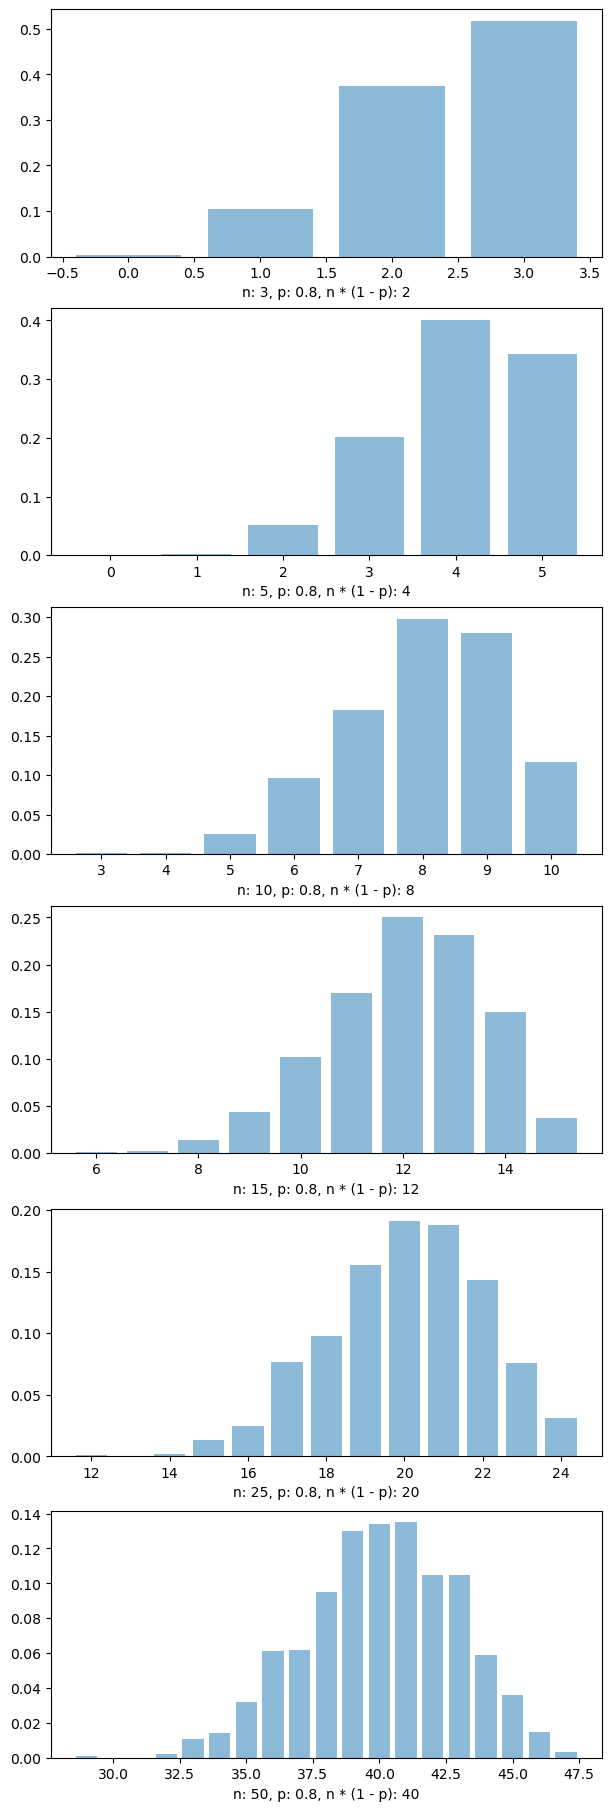

In [102]:
# создадим список с количеством испытаний (подбрасываний монеты)
n_list = [3, 5, 10, 15, 25, 50]

# подграфики будут расположеныв одном столбце с количеством строк, равном длине списка n_list
fig, ax = plt.subplots(nrows = len(n_list),
                       ncols = 1,
                       figsize = (6, 3 * len(n_list)),
                       # constrained_layout регулирует пространство между подграфиками
                       constrained_layout = True)

# пройдемся по списку n_list
for i, n in enumerate(n_list):
    # зададим вероятность успеха
    p = 0.8
    # и проверим выполняются ли условия при заданных p и n
    cond1, cond2 = n * p, n * (1 - p)
    
    # сгенерируем биноминальное распределение с заданными p и n
    np.random.seed(42)
    res = np.random.binomial(n = n, p = p, size = 1000)
    # запишем успешные серии подбрасываний и их количество
    successes, counts = np.unique(res,return_counts = True)

    # с помощью столбчатой диаграммы выведем относительную частотукаждого значения
    ax[i].bar(successes, counts / len(res), alpha = 0.5)
    # в подписис к графкам выведем n, p, а также результат проверки условий
    ax[i].set_xlabel('n: {}, p: {}, n * (1 - p): {}'.format(n, p, round(cond1), round(cond2)))

    # рассчитаем среднее значение и СКО согласно теореме Муавра_Лапласа
    mean, std = n * p, np.sqrt(n * p * (1 - p))
    # создадим 1000 точек в +/- 3 СКО от среднего значения
    x = np.linspace(mean - 3 * std, mean + 3 * std, 1000)
    # найдем точки на оси у по формуле Гаусса
    f_norm = norm.pdf(x, mean, std)
    # построим график плотности нормального распределения

plt.show()

__Поправка на неприрывность распределения__

In [103]:
# передадим методу .cdf() границу, среднее значение (loc) и СКО (scale)
area = norm.cdf(1.5, loc = 1.5, scale = 0.75)
 
# на выходе мы получим площадь под кривой
area

0.5

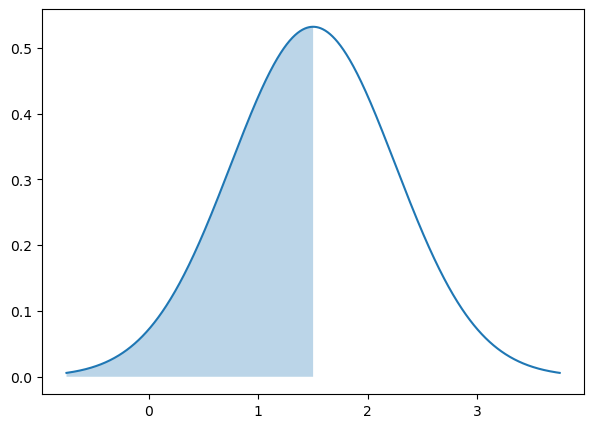

In [112]:
# зададим размер графика
plt.figure(figsize = (7,5))
 
# пропишем среднее значение и СКО
mean, std = 1.5, 0.75
 
# создадим пространство из 1000 точек в диапазоне +/- трех СКО от среднего значения
x = np.linspace(mean - 3 * std, mean + 3 * std, 1000)
 
# рассчитаем зачения по оси y с помощью метода .pdf()
# т.е. функции плотности вероятности
f = norm.pdf(x, mean, std)
 
# и построим график
plt.plot(x, f)
 
# дополнительно создадим создадим точки на оси x для закрашенной области
px = x = np.linspace(mean - 3 * std, mean, 1000)
 
# и заполним в пределах этих точек по оси x пространство
# от кривой нормального распределения до оси y = 0
plt.fill_between(px, norm.pdf(px, mean, std), alpha = 0.3)
 
# выведем оба графика на экран
plt.show()

Рассчитаем площадь с помощью Питона.

In [107]:
# передадим методу .cdf() границу, среднее значение (loc) и СКО (scale)
area = norm.cdf(2.5, loc = 1.5, scale = 0.75) - norm.cdf(1.5, loc = 1.5, scale = 0.75)
 
# на выходе мы получим площадь под кривой
area

0.4087887802741321

По мере увеличения n  поправка на непрерывность распределения становится все менее значимой.

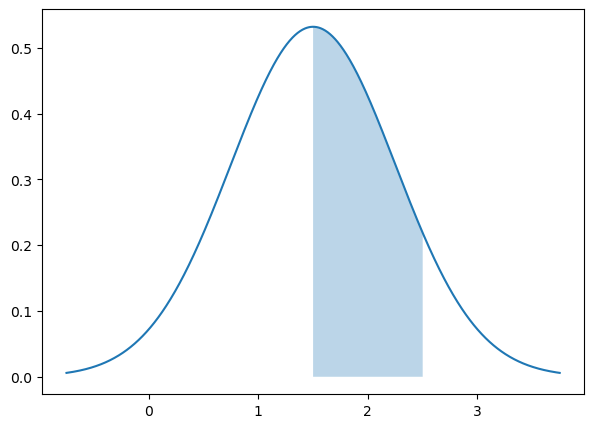

In [111]:
# зададим размер графика
plt.figure(figsize = (7, 5))
 
# пропишем среднее значение и СКО
mean, std = 1.5, 0.75
 
# создадим пространство из 1000 точек в диапазоне +/- трех СКО от среднего значения
x = np.linspace(mean - 3 * std, mean + 3 * std, 1000)
 
# рассчитаем значения по оси y с помощью метода .pdf()
# т.е. функции плотности вероятности
f = norm.pdf(x, mean, std)
 
# и построим график
plt.plot(x, f)
 
# дополнительно создадим создадим точки на оси x для закрашенной области
px = x = np.linspace(1.5, 2.5, 1000)
 
# и заполним в пределах этих точек по оси x пространство
# от кривой нормального распределения до оси y = 0
plt.fill_between(px, norm.pdf(px, mean, std), alpha = 0.3)
 
# выведем оба графика на экран
plt.show()


Для закрепления пройденного материала рассмотрим более жизненный пример. Предположим, вам поставили партию из 500 единиц оборудования. При этом вам известно, что в среднем 2% (то есть 0,02) оборудования имеют различные дефекты. Какова вероятность того, что в партии не менее 15 бракованных единиц оборудования?

In [113]:
# импортируем объект binom из модуля stats библиотеки scipy
from scipy.stats import binom
 
# зададим параметры биномиального распределения
n, p = 500, 0.02
 
# метод .cdf() рассчитывает вероятность до значения включительно (!),
# таким образом, чтобы найти X >= 15,
# мы берем значения вплоть до 14 и вычитаем результат из единицы
1 - binom.cdf(14, n, p)

0.08135689951689384

In [114]:
# рассчитаем среднее значение и СКО
mean, std = n * p, np.sqrt(n * p * (1 - p))
 
# рассчитаем площадь под кривой слева от границы и вычтем результат из единицы
1 - norm.cdf(14.5, loc = mean, scale = std)

0.07529192313308641

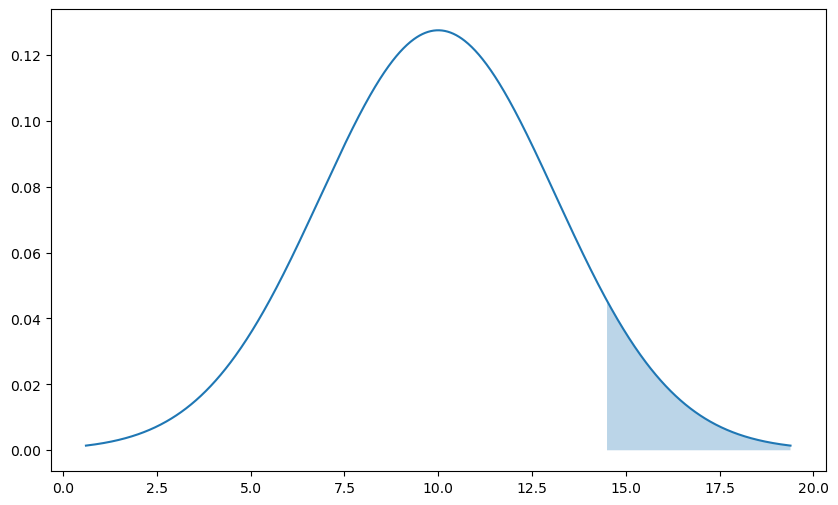

In [115]:
# зададим размер графика
plt.figure(figsize = (10,6))
 
# создадим 1000 точек в +/- 3 СКО от среднего значения
x = np.linspace(mean - 3 * std, mean + 3 * std, 1000)
# найдем точки на оси y по формуле Гаусса
f_norm = norm.pdf(x, mean, std)
# построим график плотности нормального распределения
plt.plot(x, f_norm)
 
# дополнительно создадим точки на оси х для закрашенной области
px = np.linspace(14.5, mean + 3 * std, 1000)
 
# и заполним в пределах этих точек по оси x пространство
# от кривой нормального распределения до оси y = 0
plt.fill_between(px, norm.pdf(px, mean, std), alpha = 0.3)
 
plt.show()